In [1]:
clear ; close all; clc

In [2]:
data = load('./data/ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

In [6]:
fprintf(['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']);

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



Program paused. Press enter to continue.


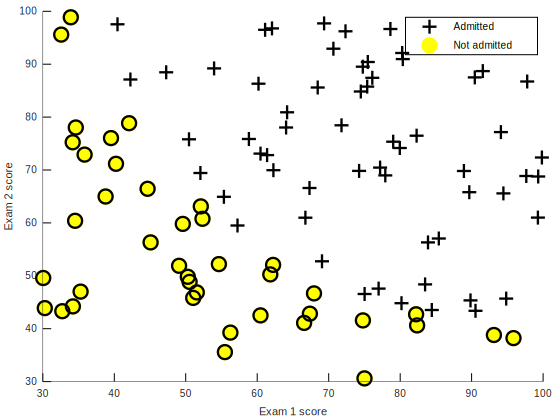

In [7]:
% Put some labels
plotData(X, y);
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');

In [8]:
%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

In [10]:
% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

In [11]:
fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [13]:
% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, X, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');



Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903 
 2.566234 
 2.646797 
Expected gradients (approx):
 0.043
 2.566
 2.647


In [14]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


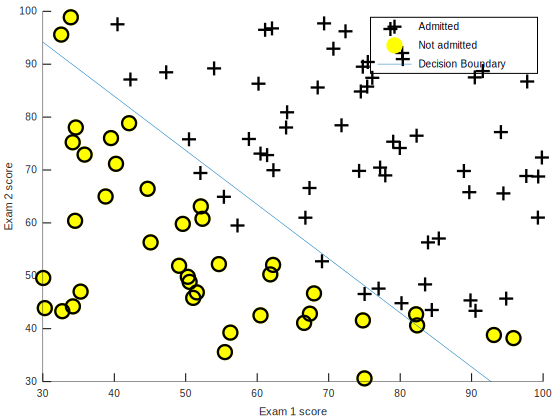

In [16]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);
% Put some labels
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

In [17]:
prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');


For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002



In [18]:
% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');
fprintf('\n');

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0

